#### symbolic pmf of $W$ based on $m$ given

In [1]:
%display latex
v = var('v')
phi = var('varphi')
y = var('y')

# recursion algorithm to find the pmf of W
# changed upon Aryan's original code
def computeW(m):
    W_mat = matrix(SR,m)
    W_mat[0,0] = 1
    
    for j in range(1,m):
        for k in range(j + 1): # if j = 1, k = 0 1
            if k < j:
                W_mat[j,k] = binomial(j,k) * (phi * v^(k+1))^(j-k) * W_mat[k,k]
            else: # k == j
                W_mat[j,j] = 1 - sum(W_mat[j,i] for i in range(j))
    
    return W_mat[-1,:]

#### realization for different $m$ and $p$

Note that we may use continued fraction to find a fraction approximation to a given decimal number. This usually gives us a smaller constant used later in substitution, and prevent our computation from numerical errors.

In [2]:
m = 4
a = 17
b = 65

p = a / b # should have coprime denom. and numer.
# cf = continued_fraction(0.2025)
# cf.convergents() # for choosing the p with small denom and num

In [3]:
# initialization
phi = exp((2*a - b) / (b*m - a*m - a)) # as in frog star 2
v = y^(b - 2*a)

W_vec = vector(computeW(m))

In [4]:
g(y) = (exp((a - a*m)/(b*m - a*m - a)) * sum(y^((m-1)*(k*a+2*a-b))*W_vec[k] for k in range(m))).simplify().factor()
latex(g(y))

-{\left(6 \, y^{246} - 6 \, y^{215} e^{\frac{31}{175}} - 6 \, y^{215} - 6 \, y^{195} + 3 \, y^{184} e^{\frac{31}{175}} + 6 \, y^{164} e^{\frac{31}{175}} + 3 \, y^{164} + 3 \, y^{153} e^{\frac{62}{175}} + y^{153} + 3 \, y^{113} - 3 \, y^{102} e^{\frac{62}{175}} - 3 \, y^{82} e^{\frac{31}{175}} - y^{60} e^{\frac{93}{175}} - 1\right)} e^{\left(-\frac{144}{175}\right)}

To have the best display of long math equations, right click the math below, then select math settings |> math renderer |> preview html.

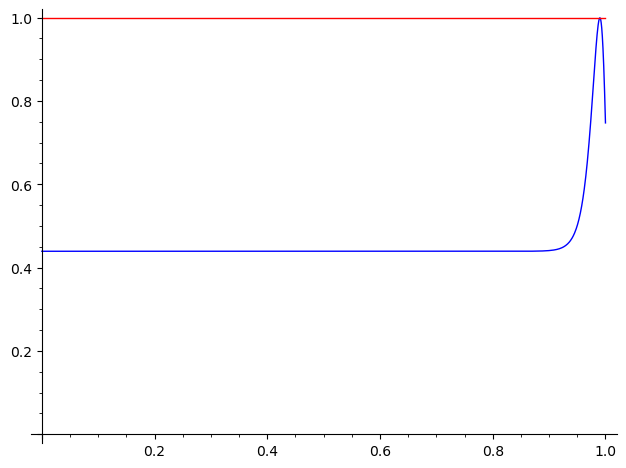

In [5]:
plot(g(y),(y,0,1), ymin = 0, ymax = 1) + plot(1, (y,0,1), ymin = 0, ymax = 1, color = 'red')

In [6]:
dg(y) = diff(g(y)).factor()
dg(y) # from which we see the multiplicity at 0

-3*(492*y^186 - 430*y^155*e^(31/175) - 430*y^155 - 390*y^135 + 184*y^124*e^(31/175) + 328*y^104*e^(31/175) + 164*y^104 + 153*y^93*e^(62/175) + 51*y^93 + 113*y^53 - 102*y^42*e^(62/175) - 82*y^22*e^(31/175) - 20*e^(93/175))*y^59*e^(-144/175)

In [7]:
mdg = mathematica(dg(y))
mdg.CountRoots([y,0,1]) # call CountRoots from Mathematica
# solve(dg(y) == 0, y, multiplicities = True) a possible alternative

60

There seems to be no `CountRoots` equivalent in SageMath. The `find_root` function gives *a* (not *the*) root of $g(y)$ within the closed interval given. It may run into precision problems if we choose a substitution constant that is too large, which makes $g'(y)$ have extremely large coefficients and involved exponents for computation.

The idea is to import the `CountRoots` function from Mathematica (this requires some setup on the computer), which hopefully helps us determine that for the function $g'(y)$, there are (1 + multiplicity of the root $y = 0$) on the closed interval $[0,1]$. If that is the case, we know there is exactly one root $y_0$ of $g'(y)$ on $(0,1]$. Then by the steps below here in the code and our analysis in the explanation document, we know that this root is indeed the argmax, with $g(y_0) < 1$.

In [8]:
y0 = dg(y).find_root(0.9,1)
y0

0.9900915461381

In [9]:
g(y0).n() # < 1

0.999346739212881

To check if this $y_0$ is indeed the argmax:

Method 1. Second Derivative Test

In [10]:
diff(dg)(y0).n() # < 0; second derivative test

-4085.34505673730

Method 2. by EVT and Fermat's theorem

In [11]:
g(0).n() # < g(y0).n()

0.439175074319636

In [12]:
g(1).n() # < g(y0).n()

0.747195382795676

To summarize,

In [14]:
print('Under m =', m, 'and p =', p, '~', float(p),'our substitution constant is', (b - a) * (m - 1),'\n\
g(y) reaches its maximum at y =', y0, 'with value', g(y0).n(), '< 1')

Under m = 4 and p = 17/65 ~ 0.26153846153846155 our substitution constant is 144 
g(y) reaches its maximum at y = 0.9900915461381 with value 0.999346739212881 < 1
